In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import yahoofinancials
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pyplot as plt

In [10]:
today = str(date.today())
print(today)

2022-04-02


In [41]:
# one way to download historical data...
yf.pdr_override() 
df = pdr.get_data_yahoo("RUB=X", start="2022-01-01", end=today)
df1 = pdr.get_data_yahoo("CL=F", start="2022-01-01", end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,74.531403,75.399002,74.463097,74.531502,74.531502,0
2022-01-03,75.185600,75.185600,74.159401,74.986000,74.986000,0
2022-01-04,74.372803,75.568001,74.361298,74.371803,74.371803,0
2022-01-05,75.263000,76.122902,75.168999,75.263000,75.263000,0
2022-01-06,76.661598,77.291702,76.043701,76.661598,76.661598,0


In [43]:
##### cleaner way to import data from Yahoo Finance
today = date.today()
d = datetime.timedelta(days=100)
start = today - d

In [44]:
def plot_tickers(tickers, start, end, interval, track, log_plot, normalize):
    data_df = yf.download(tickers,
                          start=start,
                          end=end,
                          interval=interval,
                          progress=False)

    # Drop any NaNs 
    data_df = data_df.dropna()

    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    # Plot tickers
    ticker_list = tickers.split(' ')

    for ticker in ticker_list:
        if ticker == 'BTC-USD':  
            ax = data_df[track, ticker].plot(secondary_y=True, figsize=(14, 10), legend=True, logy=log_plot, grid=True)
        else:
            ax = data_df[track, ticker].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))

    return data_df


def calc_correlation(data_df, track):
    # Get correlation and sort by sum
    sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values

    data_df[track][sum_corr].corr()

    # Call the df with the list from summed correlation, sorted ascending.
    plt.figure(figsize=(13, 8))
    ax = sns.heatmap(data_df[track][sum_corr].corr(),
                     annot=True,
                     cmap="Blues")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [45]:
# Enter tickers to plot/compare
tickers = 'RUB=X CL=F'

# Timeframe
start = '{}'.format(start)
end = '{}'.format(today)

# Time interval: can be 1m, 1h, 1d
interval = '1h'

# key to track: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
track = 'Close'

# plot options
log_plot = False
normalize = False

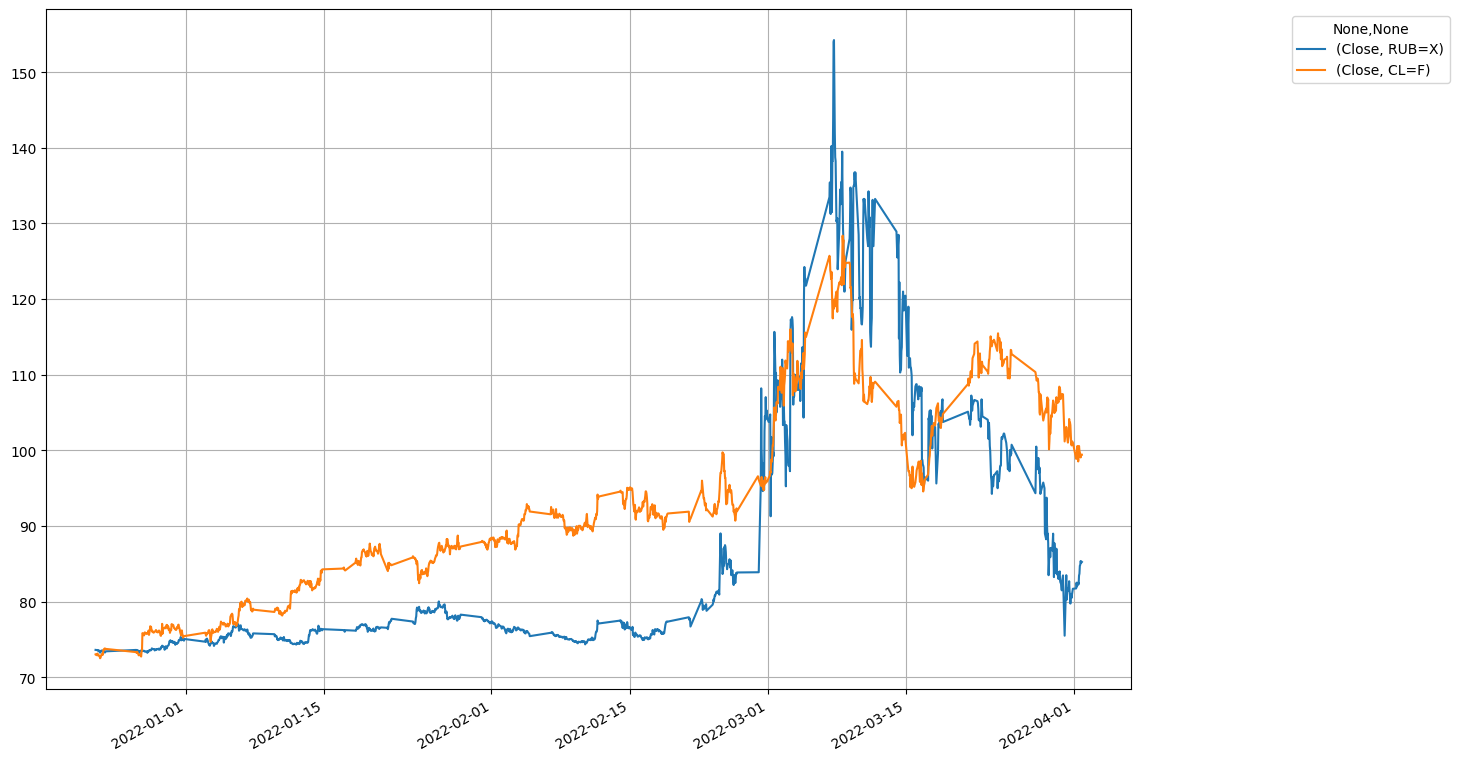

In [46]:
data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)

In [47]:
data_df.head(5)

Adj Close                 Close             \
                                CL=F      RUB=X       CL=F      RUB=X   
2021-12-22 21:00:00+00:00  73.029999  73.623100  73.029999  73.623100   
2021-12-22 23:00:00+00:00  73.080002  73.599297  73.080002  73.599297   
2021-12-23 00:00:00+00:00  72.919998  73.618698  72.919998  73.618698   
2021-12-23 01:00:00+00:00  73.080002  73.599998  73.080002  73.599998   
2021-12-23 02:00:00+00:00  73.139999  73.603798  73.139999  73.603798   

                                High                   Low             \
                                CL=F      RUB=X       CL=F      RUB=X   
2021-12-22 21:00:00+00:00  73.160004  73.724998  72.900002  73.569000   
2021-12-22 23:00:00+00:00  73.209999  73.654099  72.949997  73.421997   
2021-12-23 00:00:00+00:00  73.089996  73.661598  72.870003  73.570000   
2021-12-23 01:00:00+00:00  73.269997  73.648598  72.839996  73.582001   
2021-12-23 02:00:00+00:00  73.190002  73.650002  73.010002  73.550003   

                                Open              Volume        
                                CL=F      RUB=X     CL=F RUB=X  
2021-12-22 21:00:00+00:00  72.959999  73.720802      0.0   0.0  
2021-12-22 23:00:00+00:00  73.029999  73.629204      0.0   0.0  
2021-12-23 00:00:00+00:00  73.080002  73.572998   1998.0   0.0  
2021-12-23 01:00:00+00:00  72.930000  73.582001  10682.0   0.0  
2021-12-23 02:00:00+00:00  73.080002  73.599998   2828.0   0.0

In [48]:
# calculate correlation without shift
sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values
data_df[track][sum_corr].corr()

,CL=F,RUB=X
CL=F,1.000000,0.822388
RUB=X,0.822388,1.000000


In [49]:
df = data_df["Close"]
df.head(10)

,CL=F,RUB=X
2021-12-22 21:00:00+00:00,73.029999,73.623100
2021-12-22 23:00:00+00:00,73.080002,73.599297
2021-12-23 00:00:00+00:00,72.919998,73.618698
2021-12-23 01:00:00+00:00,73.080002,73.599998
2021-12-23 02:00:00+00:00,73.139999,73.603798
2021-12-23 03:00:00+00:00,72.889999,73.502998
2021-12-23 04:00:00+00:00,72.949997,73.548302
2021-12-23 05:00:00+00:00,72.919998,73.536003
2021-12-23 06:00:00+00:00,72.849998,73.529999
2021-12-23 07:00:00+00:00,72.769997,73.323097


In [50]:
# save this df to csv
df = df.to_csv('df.csv')

In [51]:
# shift Ruble to Crude and find optimum shift 
n = -10
d = {}
for i in range(25):
    df = pd.read_csv('df.csv')
    df['RUB=X'] = df["RUB=X"].shift(n)
    df = df.dropna()
    
    sum_corr = df.corr().sum().sort_values(ascending=True).index.values

    cor = df[sum_corr].corr()
    
    c = cor['CL=F'].iloc[-1]
    
    n += 1
    
    d[n] = c

all_values = d.values()
min_value = min(all_values)
min_key = min(d, key=d.get)

improvement = str(round(100 - (((cor['CL=F'].iloc[-1]) / min_value) * 100),4)) + "% improvement after shift"
result = "Shift: " + str(min_key) + " * " + interval + "\n" + "Correlation after shift: " + str(min_value)

print(result)
print(improvement)

Shift: 15 * 1h
Correlation after shift: 0.8147645196083712
0.0% improvement after shift


In [52]:
# shift Ruble 
df = pd.read_csv('df.csv')

df['RUB=X'] = df["RUB=X"].shift(0)
df = df.dropna()

# calculate shifted correlation
sum_corr = df.corr().sum().sort_values(ascending=True).index.values

cor = df[sum_corr].corr()
cor

,CL=F,RUB=X
CL=F,1.000000,0.822388
RUB=X,0.822388,1.000000


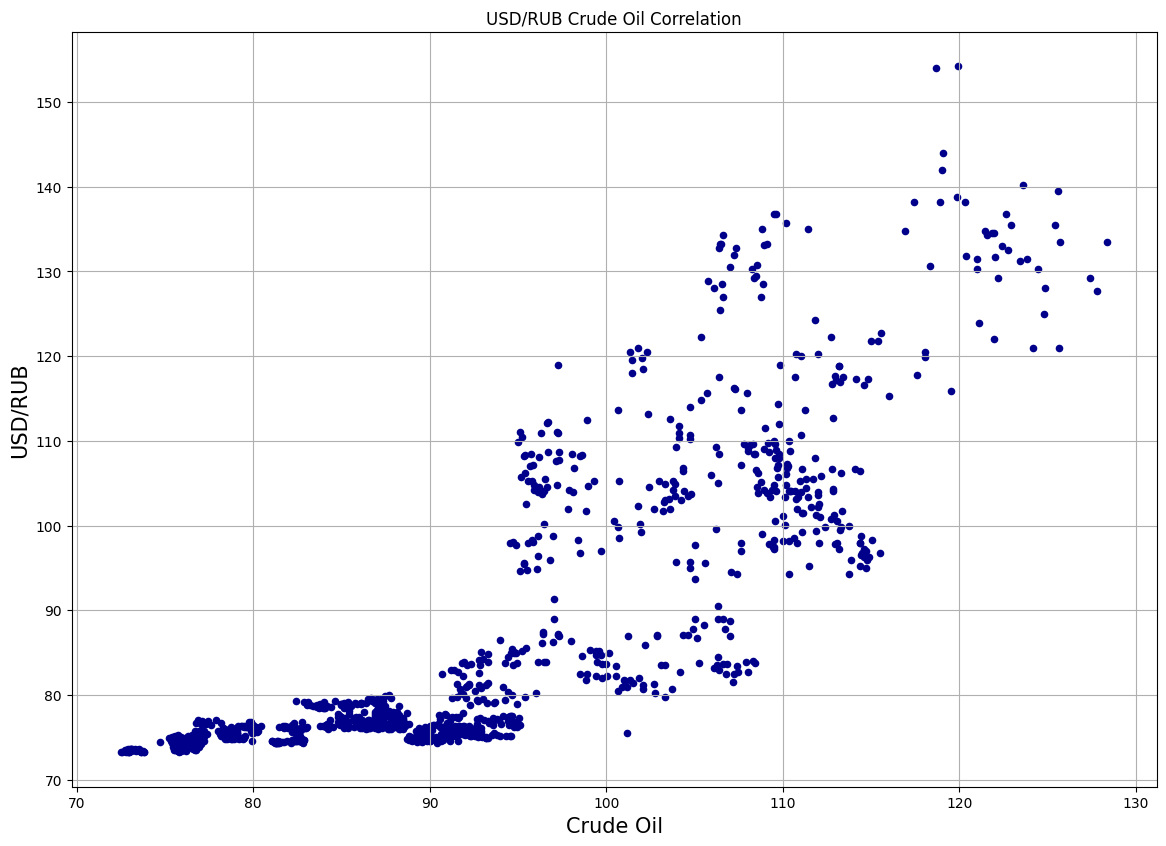

In [53]:
ax = df.plot.scatter(x='CL=F', y='RUB=X', c='DarkBlue', figsize=(14,10))

ax.set_xlabel('Crude Oil', fontsize=15)
ax.set_ylabel("USD/RUB", fontsize=15)
ax.set_title('USD/RUB Crude Oil Correlation')

ax.grid(True)

plt.savefig("correlation.png")

In [54]:
df_pct = pd.DataFrame()
df_pct["CL=F"] = df["CL=F"]
df_pct["RUB=X"] = df["RUB=X"]
df_pct = df_pct.pct_change()

In [55]:
df_pct

,CL=F,RUB=X
0,NaN,NaN
1,0.000685,-0.000323
2,-0.002189,0.000264
3,0.002194,-0.000254
4,0.000821,0.000052
...,...,...
1383,-0.002501,0.012593
1384,-0.001504,0.001475
1385,-0.004922,0.005891
1386,0.003331,-0.002928


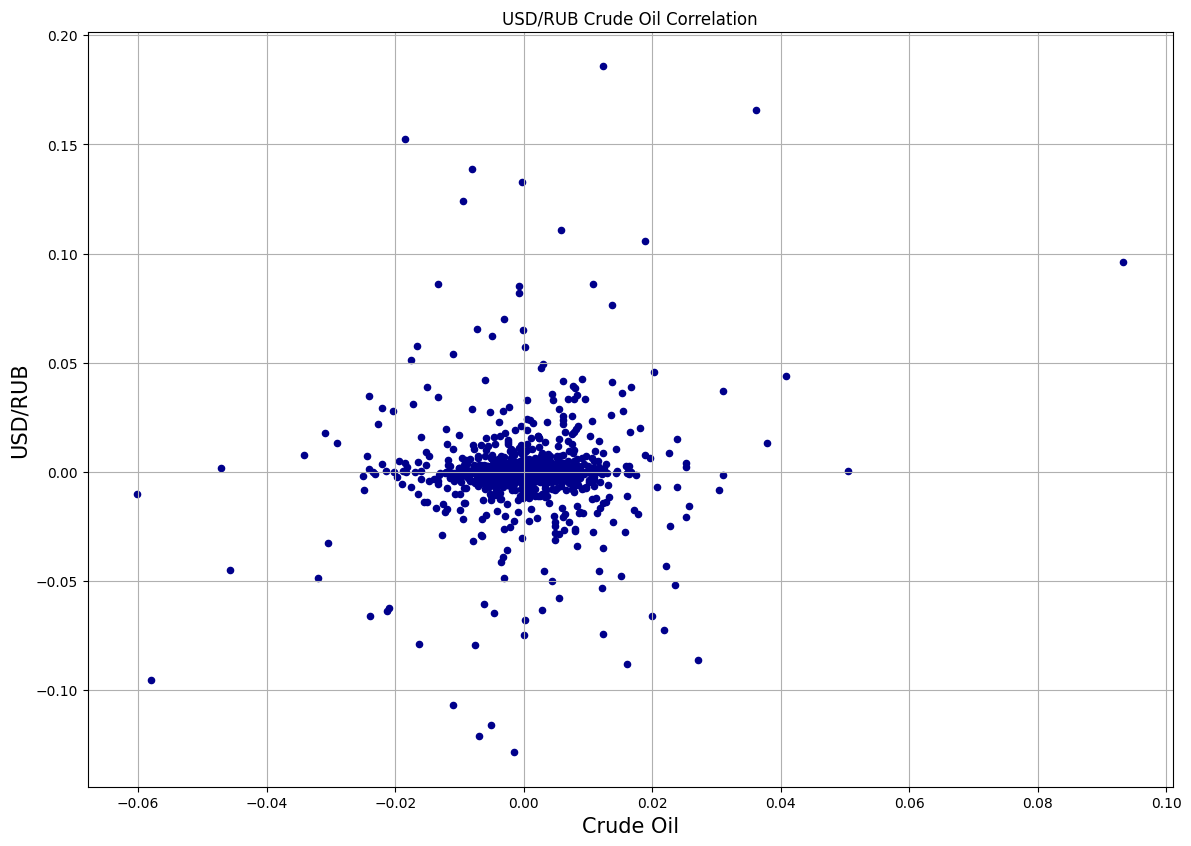

In [56]:
ax = df_pct.plot.scatter(x='CL=F', y='RUB=X', c='DarkBlue', figsize=(14,10))

ax.set_xlabel('Crude Oil', fontsize=15)
ax.set_ylabel("USD/RUB", fontsize=15)
ax.set_title('USD/RUB Crude Oil Correlation')

ax.grid(True)

plt.savefig("correlation.png")

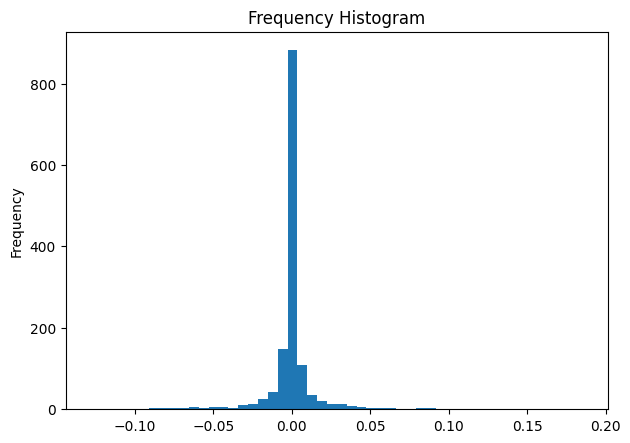

In [57]:
l = df_pct['RUB=X'].to_list()
a = sorted(l, key=float)
len(a)
n = list(range(len(a)))


%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x

plt.hist(a, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');